# Stability most sensitive at $N_S = N_R$

This notebook tries to verify the idea that
$$
\rho \geq \sqrt{\min(N_S/N_R, N_R/N_S)},
$$
is the stability criterion.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

First sample communities with constant resource supply.

Trial finished. A function for sampling as follows.

In [12]:
def sample(Ns:int,
           Nr:int,
           rho:float):
    
       Tgc = np.random.randn(2, Ns, Nr)

       G = Tgc[0]
       C = rho * Tgc[0] + np.sqrt(1-rho**2) * Tgc[1]
       G = G + 4.0
       C = C + 4.0
       Ss = 0.01 + 0.99*np.random.rand(Ns)
       Rs = 0.01 + 0.99*np.random.rand(Nr)
       l = 0.1 + 0.9*np.random.rand(Nr)

       Js = np.zeros((Ns+Nr,Ns+Nr))
       Js[0:Ns,Ns:Ns+Nr] = np.diag(Ss) @ G
       Js[Ns:Ns+Nr,0:Ns] = - np.diag(Rs) @ C.T
       Js[Ns:Ns+Nr,Ns:Ns+Nr] = - np.diag(C.T @ Ss) - np.diag(l)

       E_J = np.linalg.eigvals(Js)
       E_Jr = E_J.real
       NU_J = len(E_Jr[E_Jr >= 1.0e-7]) # if devided by Nr or Ns

       return NU_J

Want to draw a figure with x-axis being $N_S/N_R$ and y-axis being $\rho$. The color map is number of unstable mode?

Just select a horizental line, $\rho = 0.8$

In [13]:
rho = 0.8
Nr_span = range(1,64, 1)
Ns_span = range(1,64, 1)
NU = np.zeros((len(Nr_span),len(Nr_span),20))

for i in range(len(Ns_span)):
    Ns = Ns_span[i]
    for j in range(len(Nr_span)):
        Nr = Nr_span[j]
        for k in range(20):
            NU[i,j,k] = sample(Ns, Nr, rho)

In [14]:
FNC = np.mean((NU > 0).astype(float), -1)
std_FNC = np.std((NU > 0).astype(float), -1)/np.sqrt(20)

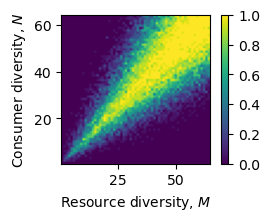

In [16]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)
plt.imshow(FNC, extent = (1-.5,64+.5,1-.5,64+.5),origin='lower')
plt.colorbar()
plt.xlabel('Resource diversity, $M$')
plt.ylabel('Consumer diversity, $N$')
plt.savefig('../figures/test20.pdf')